************Load dataset and inspect************
       age     sex     bmi  children smoker     region       charges
0     19.0  female  27.900       0.0    yes  southwest  16884.924000
1     18.0    male  33.770       1.0     no  southeast   1725.552300
2     28.0    male  33.000       3.0     no  southeast   4449.462000
3     33.0    male  22.705       0.0     no  northwest  21984.470610
4     32.0    male  28.880       0.0     no  northwest   3866.855200
5     31.0  female  25.740       0.0     no  southeast   3756.621600
6     46.0  female  33.440       1.0     no  southeast   8240.589600
7     37.0  female  27.740       3.0     no  northwest   7281.505600
8     37.0    male  29.830       2.0     no  northeast   6406.410700
9     60.0  female  25.840       0.0     no  northwest  28923.136920
10    25.0    male  26.220       0.0     no  northeast   2721.320800
11    62.0  female  26.290       0.0    yes  southeast  27808.725100
12    23.0    male  34.400       0.0     no  southwest

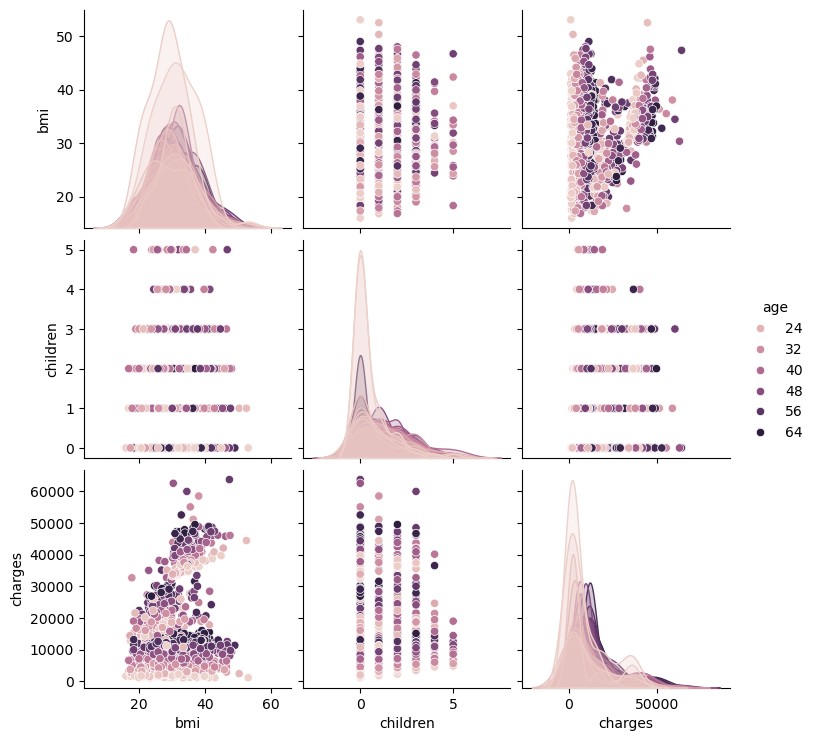

In [21]:
# Exploratory Data Analysis (EDA)
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



print("************Load dataset and inspect************")

## Load the dataset and drop rows completely empty
df = pd.read_csv("Insurance dataset Part-1.csv").dropna(how="all")


#  ***************DATA CLEANING******************


#drop unecessary artifactc'Unnamed: 7' Column
df = df.drop(columns=['Unnamed: 7'])



pd.set_option("display.max_rows", None)  #  show all rows
pd.set_option("display.max_columns", None)  # show all columns





# Check for outliers 
# paiplot display
sns.pairplot(df, hue='age')



#display  insurance dataset
print(df)




In [22]:
df.shape

(1338, 7)

In [34]:
#  CHECKING FOR MISSING VALUES
print("************Check for Missing Values ************")



print(df.isnull().sum())  # Count missing values per column

print(df[df.isnull().any(axis=1)]) # which row ?




************Check for Missing Values ************
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [43]:
# ***************Summary of stats*************** 
print(df.head()) 
print("********last 5 rows******")
print(df.tail()) 

print("********info******")
print (df.info())



    age     sex     bmi  children smoker     region      charges
0  19.0  female  27.900       0.0    yes  southwest  16884.92400
1  18.0    male  33.770       1.0     no  southeast   1725.55230
2  28.0    male  33.000       3.0     no  southeast   4449.46200
3  33.0    male  22.705       0.0     no  northwest  21984.47061
4  32.0    male  28.880       0.0     no  northwest   3866.85520
********last 5 rows******
       age     sex    bmi  children smoker     region     charges
1333  50.0    male  30.97       3.0     no  northwest  10600.5483
1334  18.0  female  31.92       0.0     no  northeast   2205.9808
1335  18.0  female  36.85       0.0     no  southeast   1629.8335
1336  21.0  female  25.80       0.0     no  southwest   2007.9450
1337  61.0  female  29.07       0.0    yes  northwest  29141.3603
********info******
<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------

In [24]:
#***************DATA ENCODING***************
from sklearn.preprocessing import LabelEncoder

#initialize
label_encoder = LabelEncoder()

#sex encoding
df['sex'] = label_encoder.fit_transform(df['sex']) # Male: 1, Female: 0
#smoker encoding
df['smoker'] = label_encoder.fit_transform(df['smoker']) # Yes: 1, No: 0
#region encoding
df['region'] = label_encoder.fit_transform(df['region'])

print(df.head(10)) # first 10 rows





    age  sex     bmi  children  smoker  region      charges
0  19.0    0  27.900       0.0       1       3  16884.92400
1  18.0    1  33.770       1.0       0       2   1725.55230
2  28.0    1  33.000       3.0       0       2   4449.46200
3  33.0    1  22.705       0.0       0       1  21984.47061
4  32.0    1  28.880       0.0       0       1   3866.85520
5  31.0    0  25.740       0.0       0       2   3756.62160
6  46.0    0  33.440       1.0       0       2   8240.58960
7  37.0    0  27.740       3.0       0       1   7281.50560
8  37.0    1  29.830       2.0       0       0   6406.41070
9  60.0    0  25.840       0.0       0       1  28923.13692


Text(0.5, 1.0, 'Insurance Correlation Heatmap')

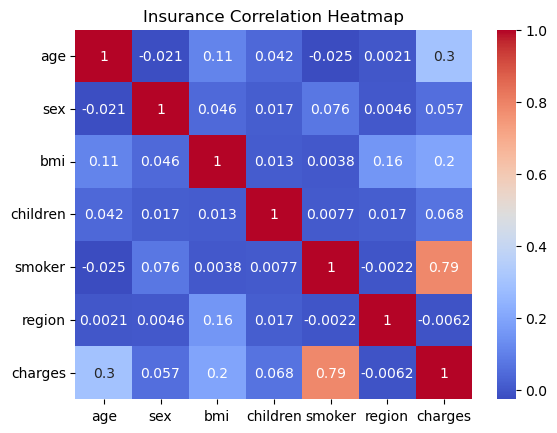

In [25]:
#heatmap for the correlation matrix
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm")

# Display heatmap
plt.title("Insurance Correlation Heatmap")

# ***************ENCODED DATASET***************

       age  sex     bmi  children  smoker  region       charges
0     19.0    0  27.900       0.0       1       3  16884.924000
1     18.0    1  33.770       1.0       0       2   1725.552300
2     28.0    1  33.000       3.0       0       2   4449.462000
3     33.0    1  22.705       0.0       0       1  21984.470610
4     32.0    1  28.880       0.0       0       1   3866.855200
5     31.0    0  25.740       0.0       0       2   3756.621600
6     46.0    0  33.440       1.0       0       2   8240.589600
7     37.0    0  27.740       3.0       0       1   7281.505600
8     37.0    1  29.830       2.0       0       0   6406.410700
9     60.0    0  25.840       0.0       0       1  28923.136920
10    25.0    1  26.220       0.0       0       0   2721.320800
11    62.0    0  26.290       0.0       1       2  27808.725100
12    23.0    1  34.400       0.0       0       3   1826.843000
13    56.0    0  39.820       0.0       0       2  11090.717800
14    27.0    1  42.130       0.0       

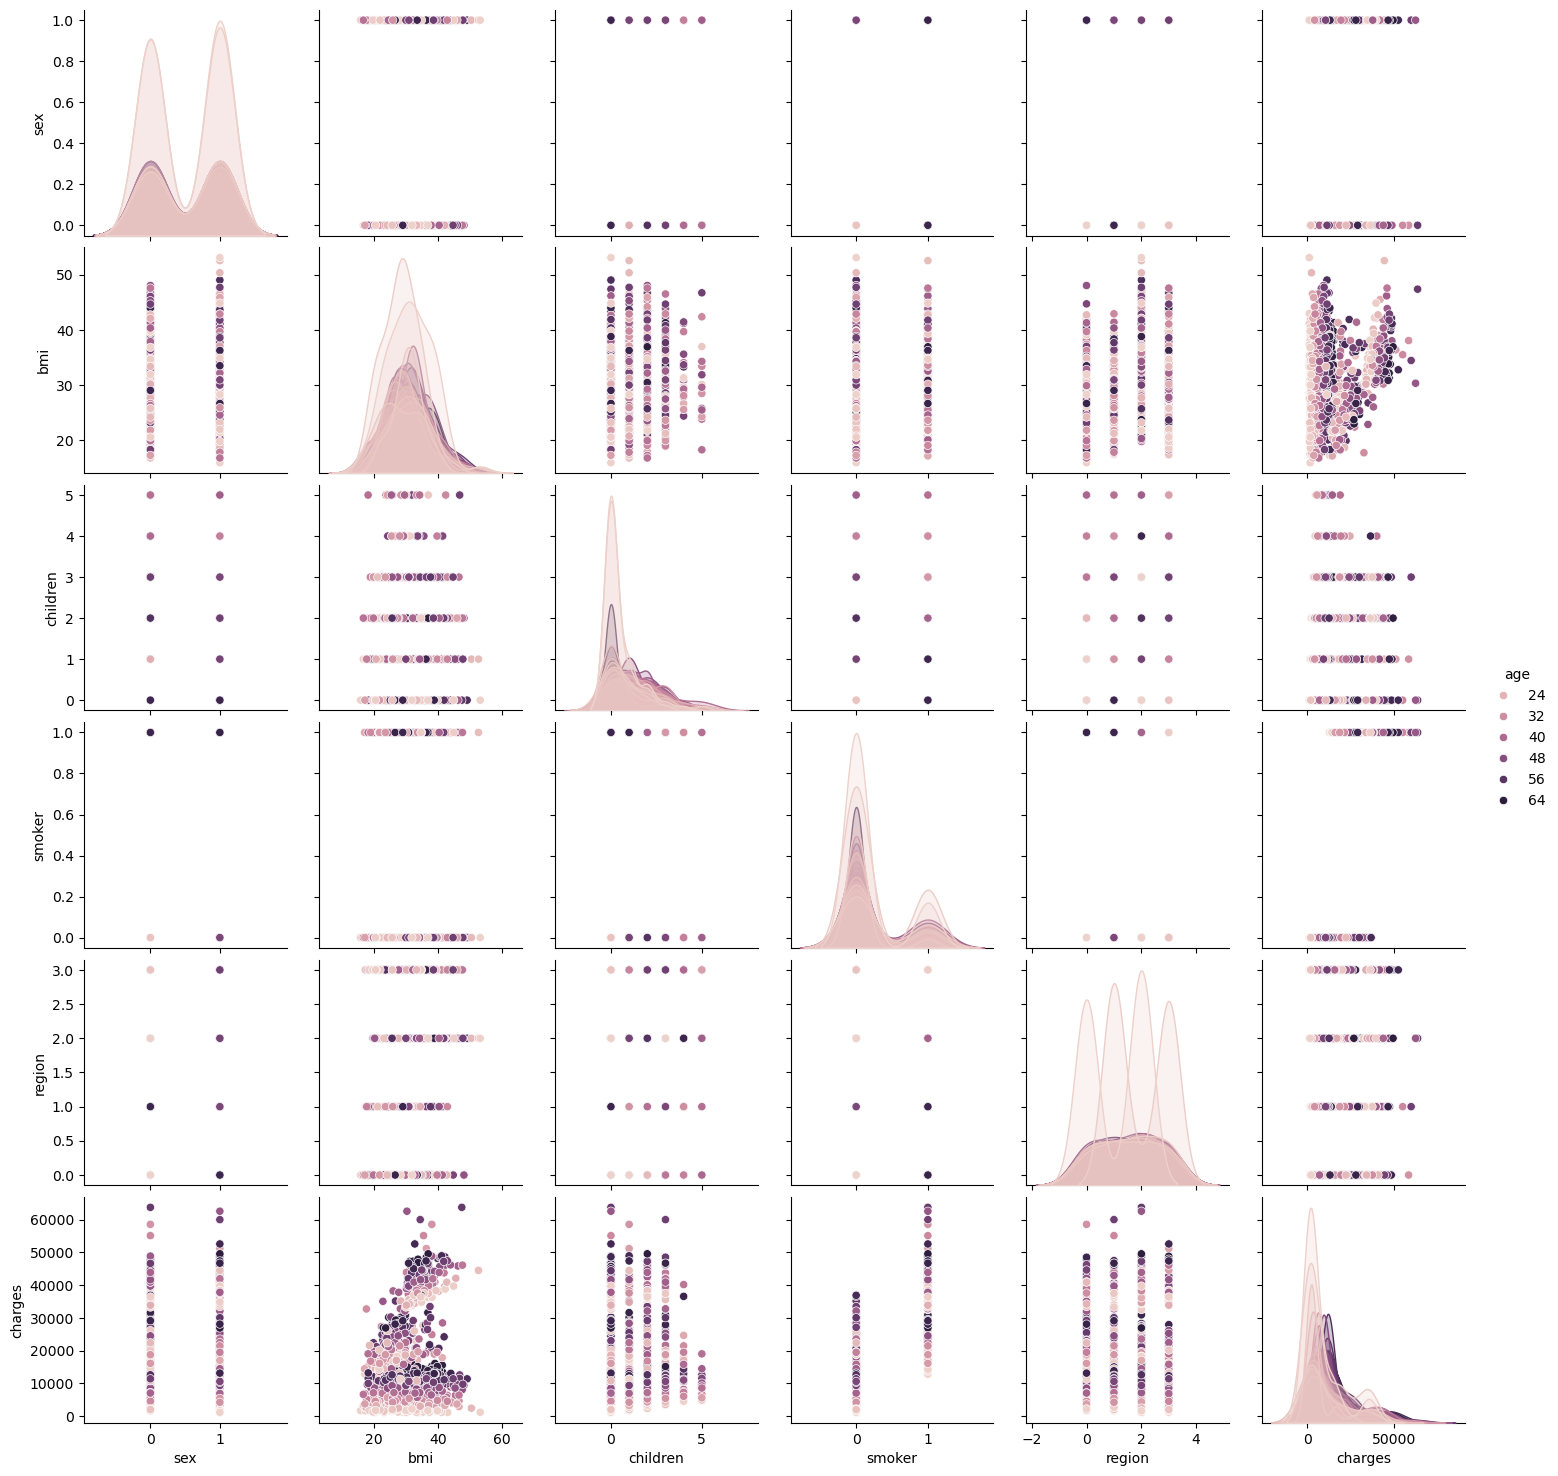

In [28]:
#***************ENCODED DATASET***************

# Load the encoded dataset
df = pd.read_csv("encoded_Insurance dataset Part-1.csv")


pd.set_option("display.max_rows", None)  #  show all rows
pd.set_option("display.max_columns", None)  # show all columns


# Check for outliers 
# paiplot display
sns.pairplot(df, hue='age')


#display  encoded insurance dataset
print(df)

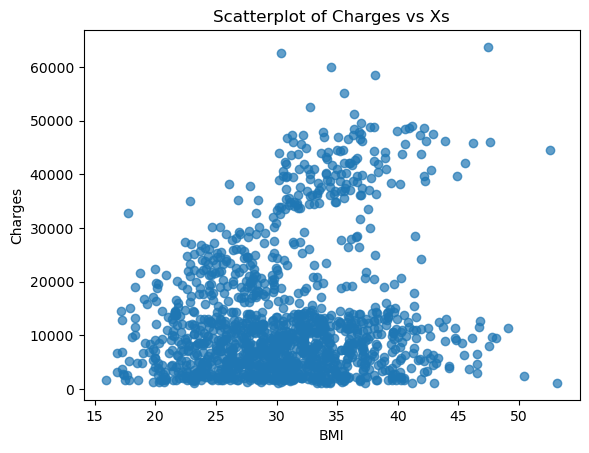

In [29]:
# Scatterplot Xs vs  y (Charges) for linearity
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("encoded_Insurance dataset Part-1.csv")
plt.scatter(df["bmi"], df["charges"], alpha=0.7)
plt.title("Scatterplot of Charges vs Xs")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

In [30]:
#dataframe
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,3,16884.924000
1,18.0,1,33.770,1.0,0,2,1725.552300
2,28.0,1,33.000,3.0,0,2,4449.462000
3,33.0,1,22.705,0.0,0,1,21984.470610
4,32.0,1,28.880,0.0,0,1,3866.855200
5,31.0,0,25.740,0.0,0,2,3756.621600
6,46.0,0,33.440,1.0,0,2,8240.589600
7,37.0,0,27.740,3.0,0,1,7281.505600
8,37.0,1,29.830,2.0,0,0,6406.410700
9,60.0,0,25.840,0.0,0,1,28923.136920


# ***************TRAIN OUR MODEL***************

In [33]:
#***************TRAIN OUR MODEL***************

#************model was Re-trained by adding a Random state value************

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# prepare our  data
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]  # X Variables as dataframes
y = df[['charges']] # y dependent var

# Split our insurance dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42 ) 


In [34]:
X.shape

(1338, 6)

In [35]:
y.shape

(1338, 1)

In [36]:
#***************TRAINING OUR MODEL***************

#Initialize model  
modelReg = LinearRegression() #assign modelRegressor as our linearReg

#Train our Model
modelReg.fit(X_train, y_train)  




LinearRegression()

In [37]:
modelReg.intercept_

array([-11946.60656726])

In [38]:
modelReg.coef_

array([[ 2.57056264e+02, -1.87914567e+01,  3.35781491e+02,
         4.25091456e+02,  2.36478181e+04, -2.71284266e+02]])

In [39]:
y_prediction = modelReg.predict(X_test)

In [153]:
y_prediction

array([[ 2.76287039e+04],
       [ 1.65470516e+04],
       [ 3.97766345e+03],
       [ 3.54131652e+04],
       [ 9.30966750e+02],
       [ 6.87550412e+03],
       [ 9.85021423e+03],
       [ 1.88736029e+03],
       [ 7.44845010e+03],
       [ 8.58975425e+03],
       [ 2.73629541e+04],
       [-1.09321186e+03],
       [ 1.37102251e+04],
       [ 1.24521273e+04],
       [ 4.10548801e+03],
       [ 3.67334947e+03],
       [ 1.73040328e+04],
       [ 1.37704505e+04],
       [ 1.31351392e+04],
       [ 1.29162070e+04],
       [ 3.90221525e+03],
       [ 1.20998274e+04],
       [ 4.00025706e+04],
       [ 1.71543666e+03],
       [ 6.74951291e+03],
       [ 9.23268866e+03],
       [ 2.69047504e+04],
       [ 1.19310079e+04],
       [ 1.16902087e+04],
       [ 2.76785255e+04],
       [ 9.82182160e+03],
       [ 1.34950570e+04],
       [ 1.04099248e+04],
       [ 4.72279558e+03],
       [ 2.65782166e+03],
       [ 1.25175386e+04],
       [ 9.14490895e+03],
       [ 3.96217158e+04],
       [ 1.2

In [40]:
# ***************TRAINING OUR MODEL***************

#dataframe
results = pd.DataFrame({
    "Actual Charges": y_test['charges'],
    "Predicted Charges": y_prediction.flatten()
})





In [41]:
results

,Actual Charges,Predicted Charges
764,9095.068250,8924.407244
887,5272.175800,7116.295018
890,29330.983150,36909.013521
1293,9301.893550,9507.874691
259,33750.291800,27013.350008
1312,4536.259000,10790.779562
899,2117.338850,226.298446
752,14210.535950,16942.715999
1286,3732.625100,1056.630794
707,10264.442100,11267.919973


In [43]:
results.shape

(268, 2)

# ***********MODEL*EVALUATION*************** 

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# function to calculate and print the evaluation metrics whenever called
def printEva(model, X_test, y_test):
   
    # Make predictions
    y_prediction = model.predict(X_test)
    
    # Calculate Metrics
    mse = mean_squared_error(y_test, y_prediction)  # Mean Squared Error
    mae = mean_absolute_error(y_test, y_prediction)  # Mean Absolute Error
    r2 = r2_score(y_test, y_prediction)  # R-squared

    # Print Results
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")


In [45]:
#call the printEvaluation function
printEva(modelReg, X_test, y_test)


Mean Squared Error: 33635210.431178406
Mean Absolute Error: 4186.508898366435
R-squared: 0.7833463107364539


# ******** Prediction score********* 

modelReg score = 0.7833463107364539

In [46]:
# ******** Prediction score********* 

modelReg.score (X_test, y_test)

0.7833463107364539

# * lets_visualize_results** using scatter plot* 


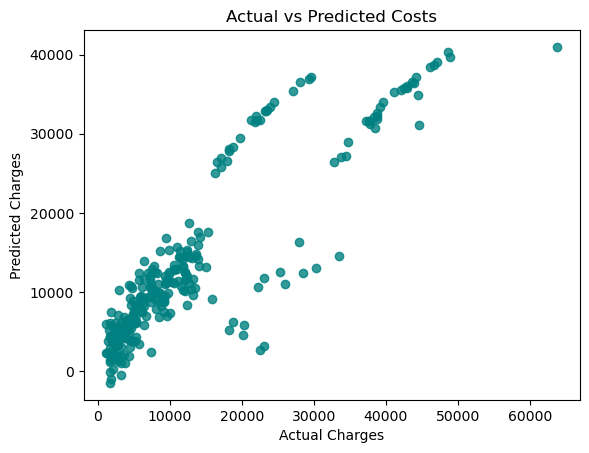

In [47]:
# ******** lets_visualize_results********* 


# Scatter Plot
plt.scatter(y_test, y_prediction, alpha=0.8, color='teal')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Costs")
plt.show()



# ************************************4-A*** INTERPRETATION OF OUR FINDINGS***********************************

## (EDA) above scatter plot and few other insights our dataset shows a linear tendency.

#age
* There is a positive correlation between age and charges. Older individuals are susceptible to higher medical costs due to increased health risks associated with aging. 
Some outliers like individuals under 25 see high charges,because have health issue due their smoking habits.*

#Smoker
* Smoking is actually the  strongest single predictor of charges. Smokers consistently incur significantly higher medical costs compared to non-smokers. *
 
#bmi
* bmi variable slightly correlates with charges. Higher BMI values often  increase medical costs. *

#sex, region, and children
* The other variables like sex, children and region, have weaker relationships with medical charges.
A slight increase trend  with the number of children, but the relationship is quite weak. *

## EVALUTION METRIC USED AND WHY
- 

MSE is 33,635,210.43, indicating the average squared difference between predicted and actual charges. This metric was used for best accura

- MAE is 4,186.51, and this number gives a more interpretable measure of average magnitude  errors.

- R² found is  0.7833 or 78.33% . This indicates the model has a good fit but still leaves room for improvement.

cy.

                                                                                                


 # **************** LETS* FINE TUNE OR RE-TRAIN OUR MODEL*************** 

In [61]:
 #**************** LETS* FINE TUNE OR RE-TRAIN OUR MODEL*************** 
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Ridge Regression
ridge = Ridge(alpha=1.0)  # Alpha is fr regularization strength
ridge.fit(X_train, y_train)  # Train the model
ridge_predictions = ridge.predict(X_test)  # Make predictions once more

# Evaluate Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions) # Calculate MAE




print(f"Ridge Regression - MSE: {ridge_mse}, R-squared: {ridge_r2}, MAE: {ridge_mae}")



Ridge Regression - MSE: 33675792.154202305, R-squared: 0.7830849126391299, MAE: 4198.141005321735


In [63]:
# Lasso Regression
lasso = Lasso(alpha=0.1)  # Alpha determines regularization strength[0.1] 

lasso.fit(X_train, y_train)  # Train the model
lasso_predictions = lasso.predict(X_test)  # Make predictions

# Evaluate Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)  # Calculate MAE


print(f"Lasso Regression - MSE: {lasso_mse}, R-squared: {lasso_r2}, MAE: {lasso_mae}")


Lasso Regression - MSE: 33635622.345914654, R-squared: 0.7833436574797586, MAE: 4186.582632817467


# * EVALUATION OUR FINE TUNED MODEL** 
 

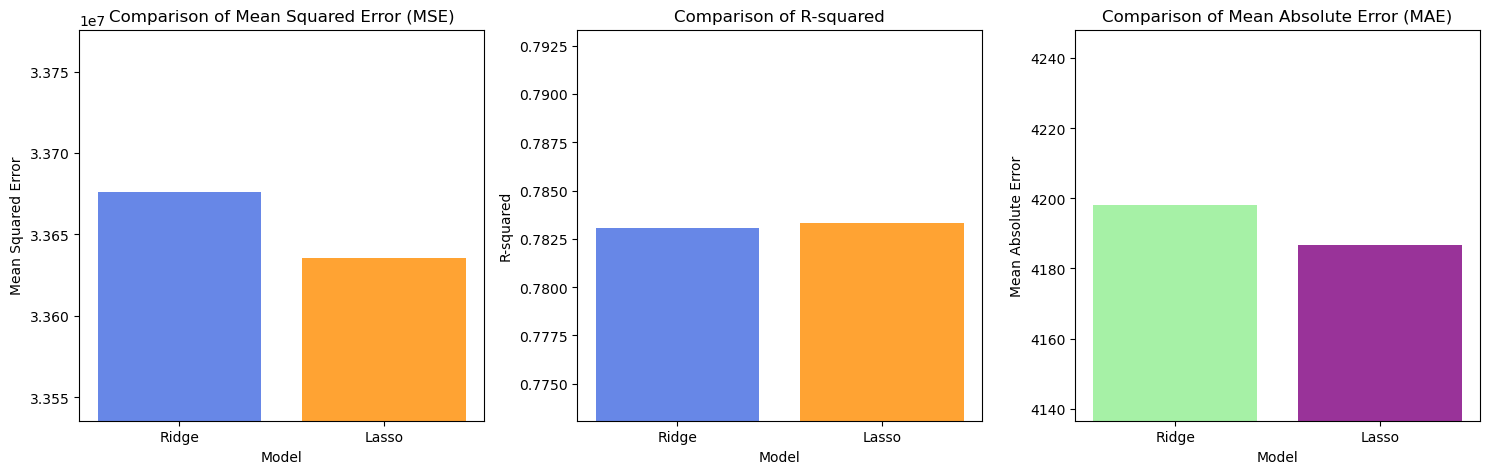

In [67]:


# Data findings for plotting
models = ['Ridge', 'Lasso']

mse_values = [33675792.15, 33635622.34]  # MSE for Ridge and Lasso
r2_values = [0.7830849126391299, 0.7833436574797586]  #both
mae_values = [4198.1410053, 4186.5826328]  # both

# Create a bar plot for MSE
plt.figure(figsize=(15, 5))

# MSE Plot
plt.subplot(1, 3, 1)  # Create first subplot
plt.bar(models, mse_values, color=['royalblue', 'darkorange'], alpha=0.8)
plt.title('Comparison of Mean Squared Error (MSE)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.ylim(min(mse_values) - 100000, max(mse_values) + 100000)  # Im Adjusting the scale for better visibility

# R-squared Plot
plt.subplot(1, 3, 2)  # Create second subplot
plt.bar(models, r2_values, color=['royalblue', 'darkorange'], alpha=0.8)
plt.title('Comparison of R-squared')
plt.ylabel('R-squared')
plt.xlabel('Model')
plt.ylim(min(r2_values) - 0.01, max(r2_values) + 0.01) 


# MAE Plot
plt.subplot(1, 3, 3)  #three plots
plt.bar(models, mae_values, color=['lightgreen', 'purple'], alpha=0.8)
plt.title('Comparison of Mean Absolute Error (MAE)')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Model')
plt.ylim(min(mae_values) - 50, max(mae_values) + 50)  # scale fr visibility



# Display the plots
plt.tight_layout()
plt.show()


#  INTERPRETATION of FINDINGS " after re-training  "


### intial model training
Mean Squared Error: 33635210.4311784065
R-squared: 0.783346310736453Mean Absolute Error: 4186.5088983664359


### Ridge Regression:

MSE: 33,675,792.15

R-squared: 0.7831

MAE: 4198.141005321735

Slightly higher error than Lasso, but still 
robust at explaining 78.31% of the variance.

### Lasso Regression:

MSE: 33,635,622.34

R-squared: 0.7833

MAE: 4186.58263281746d




Marginally better performance with 
slightly lower error and higher explanatory power at 78riIn summary, son:

Both models perform similarly with only minor diffe butences.
 shows a superior performancet edge in reducing error and explaining vari
 ce.


OTHER METRIC FEATURES LIKE PolynomialFeature,Feature Engineering(Dimensionality Reduction) TO IMPROVE MODEL 
    